<a href="https://colab.research.google.com/github/mwojcik01/CNN/blob/main/Kopia_notatnika_dobry_Projekt_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kopiowanie
import os
import numpy as np
import shutil

#przygotowanie modelu
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras import layers
from keras import optimizers
from tensorflow.keras import optimizers
#from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#wykres
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!unzip -uq "/content/drive/My Drive/base_ddsm_cbm_2.zip" -d "./" # wypakowanie plików z Drive

In [ ]:
base_dir = './base_ddsm_cbm_2' # obliczanie ilości plików w każdym folderze
raw_no_of_files = {}
classes = ['ben_mal', 'nor']
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('ben_mal', 2003), ('nor', 9215)])

In [ ]:
#kasowanie plików
%%bash
pwd
rm -R images
ls

/content
base_ddsm_cbm_2
drive
sample_data


In [ ]:
data_dir = './images' # tworzenie katalogów: treningowego, walidacyjnego oraz testowego. 
                      #w każdym znajdują się 2 foldery: nor, ben_mal

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

train_nor_dir = os.path.join(train_dir, 'nor')
train_ben_mal_dir = os.path.join(train_dir, 'ben_mal')

valid_nor_dir = os.path.join(valid_dir, 'nor')
valid_ben_mal_dir = os.path.join(valid_dir, 'ben_mal')

test_nor_dir = os.path.join(test_dir, 'nor')
test_ben_mal_dir = os.path.join(test_dir, 'ben_mal')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_nor_dir, train_ben_mal_dir, valid_nor_dir, valid_ben_mal_dir, test_nor_dir, test_ben_mal_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [ ]:
#kopiowanie
nor_fnames = os.listdir(os.path.join(base_dir, 'nor'))
ben_mal_fnames = os.listdir(os.path.join(base_dir, 'ben_mal'))


nor_fnames = [fname for fname in nor_fnames if fname.split('.')[1].lower() in ['png']]
ben_mal_fnames = [fname for fname in ben_mal_fnames if fname.split('.')[1].lower() in ['png']]

In [ ]:
size = min(len(nor_fnames), len(ben_mal_fnames)) # ustalanie ilości plików w folderze 

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [ ]:
for i, fname in enumerate(nor_fnames): # proces kopiowania plików
    if i <= train_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(train_nor_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(valid_nor_dir, fname)
        shutil.copyfile(src, dst) 
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(test_nor_dir, fname)
        shutil.copyfile(src, dst) 

for i, fname in enumerate(ben_mal_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(train_ben_mal_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(valid_ben_mal_dir, fname)
        shutil.copyfile(src, dst) 
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(test_ben_mal_dir, fname)
        shutil.copyfile(src, dst)

In [ ]:
# sprawdzanie ilości plików w folderach
print('nor - trening', len(os.listdir(train_nor_dir))) 
print('nor - walidacja', len(os.listdir(valid_nor_dir)))
print('nor - test', len(os.listdir(test_nor_dir)))

print('ben_mal - trening', len(os.listdir(train_ben_mal_dir)))
print('ben_mal - walidacja', len(os.listdir(valid_ben_mal_dir)))
print('ben_mal - test', len(os.listdir(test_ben_mal_dir)))

nor - trening 1403
nor - walidacja 400
nor - test 200
ben_mal - trening 1403
ben_mal - walidacja 400
ben_mal - test 200


In [ ]:
# przeskalowanie obrazów o współczynnik 1/255
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(128, 128),
                                                   batch_size=20,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(128, 128),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2806 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('dane:', data_batch.shape)
    break

dane: (20, 128, 128, 3)


In [ ]:
model = Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.2),
        layers.Dense(units=256, activation='relu'),
        layers.Dense(units=1, activation='sigmoid') 
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)      

In [ ]:
batch_size = 16
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

In [ ]:
model.compile(optimizer=optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=30,
                    validation_data=valid_generator,
                    validation_steps=validation_steps)

Epoch 1/30
87/87 [==============================] - 3s 25ms/step - loss: 0.6939 - accuracy: 0.5052 - val_loss: 0.6924 - val_accuracy: 0.5180
Epoch 2/30
87/87 [==============================] - 2s 24ms/step - loss: 0.6859 - accuracy: 0.5580 - val_loss: 0.6660 - val_accuracy: 0.7240
Epoch 3/30
87/87 [==============================] - 2s 23ms/step - loss: 0.6241 - accuracy: 0.6628 - val_loss: 0.5991 - val_accuracy: 0.6420
Epoch 4/30
87/87 [==============================] - 2s 24ms/step - loss: 0.5646 - accuracy: 0.7121 - val_loss: 0.5571 - val_accuracy: 0.7380
Epoch 5/30
87/87 [==============================] - 2s 23ms/step - loss: 0.5475 - accuracy: 0.7387 - val_loss: 0.5526 - val_accuracy: 0.7360
Epoch 6/30
87/87 [==============================] - 2s 23ms/step - loss: 0.4998 - accuracy: 0.7596 - val_loss: 0.4766 - val_accuracy: 0.8000
Epoch 7/30
87/87 [==============================] - 2s 23ms/step - loss: 0.4548 - accuracy: 0.7920 - val_loss: 0.4313 - val_accuracy: 0.7980
Epoch 8/30
87

In [ ]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(128, 128),
                                                 batch_size=8,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Dokładność testowania:', test_acc)

Found 400 images belonging to 2 classes.
50/50 [==============================] - 0s 8ms/step - loss: 0.7219 - accuracy: 0.8350
Dokładność testowania: 0.8349999785423279


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_prob = model.predict(test_generator, test_generator.samples)
y_prob = y_prob.ravel()
y_prob

Found 400 images belonging to 2 classes.


array([4.62370971e-03, 2.61826038e-01, 8.83707285e-01, 2.41457604e-10,
       2.25650504e-01, 9.95635569e-01, 8.49324763e-02, 9.99989390e-01,
       7.04945880e-04, 2.71630511e-02, 4.23955806e-02, 3.84370855e-04,
       2.01097721e-28, 5.69383133e-07, 9.62369800e-01, 1.46253500e-04,
       6.26981035e-02, 9.73087728e-01, 7.44253848e-05, 3.71146023e-01,
       3.48089141e-10, 2.00733100e-03, 3.46256769e-04, 6.69143219e-07,
       1.10012998e-05, 3.10192350e-04, 3.63597374e-10, 4.47177678e-01,
       2.27221353e-16, 1.53295130e-01, 2.51946878e-03, 8.72657446e-10,
       5.33316424e-03, 1.17600348e-03, 5.02572334e-07, 1.82946876e-03,
       4.27789128e-05, 4.04957746e-06, 1.90863502e-05, 2.60641304e-04,
       1.35799030e-06, 9.73277509e-01, 2.65520696e-11, 2.77966112e-08,
       9.72763002e-01, 2.40516347e-05, 1.33219785e-07, 8.83400480e-06,
       8.67356300e-01, 2.43665241e-02, 4.80966711e-10, 2.83558511e-05,
       8.34568782e-05, 1.25034735e-01, 1.68543600e-04, 7.72883534e-01,
      

In [ ]:
predictions  = pd.DataFrame({'y_prob': y_prob})
predictions['class'] = predictions['y_prob'].apply(lambda x: 1 if x > 0.5 else 0)
predictions

,y_prob,class
0,4.623710e-03,0
1,2.618260e-01,0
2,8.837073e-01,1
3,2.414576e-10,0
4,2.256505e-01,0
...,...,...
395,9.852113e-01,1
396,9.282775e-01,1
397,9.989504e-01,1
398,4.044670e-01,0


In [ ]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred = predictions['class'].values
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_generator.class_indices

{'ben_mal': 0, 'nor': 1}

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[165,  35],
       [ 31, 169]])

In [ ]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Macierz błędów', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:
model.evaluate(test_generator)

400/400 [==============================] - 2s 5ms/step - loss: 0.7219 - accuracy: 0.8350


[0.7219323515892029, 0.8349999785423279]

In [ ]:


STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

test_generator.reset()
preds = model.predict(test_generator, verbose = 1)

400/400 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(test_generator.classes, preds)


roc_auc = auc(fpr,tpr)

In [ ]:


print('AUC:', roc_auc )



AUC: 0.903775


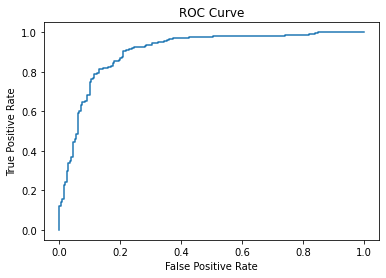

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()